Заша задача - выделить основные тренды в видео генерации в 2024 году.

- Получить метаданные статей с arXiv (любым способом) по теме “видео генерация”, выпущенных в 2024 году.
- Написать код для выделения основных тем/трендов.
Будет плюсом, если каждая тема будет представлена связным словосочетанием/предложением
- Представить визуализацию результатов.


# Импорт библиотек

In [ ]:
#!pip install numpy==1.24.0

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

# Парсинг

In [ ]:
url='https://arxiv.org/search/advanced?advanced=1&terms-0-operator=AND&terms-0-term=video+generation&terms-0-field=title&classification-computer_science=y&classification-physics_archives=all&classification-include_cross_list=include&date-filter_by=specific_year&date-year=2024&date-from_date=&date-to_date=&date-date_type=submitted_date&abstracts=show&size=200&order=-announced_date_first&start=0'
url2='https://arxiv.org/search/advanced?advanced=1&terms-0-operator=AND&terms-0-term=video+generation&terms-0-field=title&classification-computer_science=y&classification-physics_archives=all&classification-include_cross_list=include&date-filter_by=specific_year&date-year=2024&date-from_date=&date-to_date=&date-date_type=submitted_date&abstracts=show&size=200&order=-announced_date_first&start=200'
url3='https://arxiv.org/search/advanced?advanced=1&terms-0-operator=AND&terms-0-term=video+generation&terms-0-field=title&classification-computer_science=y&classification-physics_archives=all&classification-include_cross_list=include&date-filter_by=specific_year&date-year=2024&date-from_date=&date-to_date=&date-date_type=submitted_date&abstracts=show&size=200&order=-announced_date_first&start=400'
urls = [url, url2, url3]

In [ ]:
def get_dict_article(urls):
  result = {}
  for i in urls:
    response = requests.get(i)
    response.raise_for_status()  # Проверяем успешность запроса
    soup = BeautifulSoup(response.text, 'html.parser')
    articles = soup.find_all('li', class_='arxiv-result')
    for index, article in enumerate(articles):
          # Извлекаем заголовок
          title_tag = article.find('p', class_='title')
          title = title_tag.get_text(strip=True) if title_tag else ""

          # Извлекаем аннотацию
          abstract_tag = article.find('p', class_='abstract')
          abstract = ""
          if abstract_tag:
              # Пытаемся получить полную аннотацию
              full_abstract = abstract_tag.find('span', class_='abstract-full')
              if full_abstract:
                  abstract = full_abstract.get_text(strip=True)
              else:
                  # Если полной нет, берем сокращенную
                  short_abstract = abstract_tag.find('span', class_='abstract-short')
                  if short_abstract:
                      abstract = short_abstract.get_text(strip=False)
                      # Удаляем "▽ More" и все после него
                      abstract = abstract.split('▽ More')[0].strip()

              # Удаляем метку "Abstract:" если она есть
              abstract = abstract.replace("Abstract:", "").strip()

          result[title] = [abstract]
  return result

In [ ]:
result = get_dict_article(urls)

In [ ]:
data = pd.DataFrame()

In [ ]:
data['abstract'] = result.values()

In [ ]:
data.shape

(444, 1)

# EDA и Preproccesing

In [ ]:
data['abstract'] = data['abstract'].apply(lambda x: ' '.join(str(item) for item in x))

In [ ]:
data['length'] = data.abstract.apply(lambda row: len(row.split()))
print('Mean length: ', data['length'].mean())

Mean length:  183.18018018018017


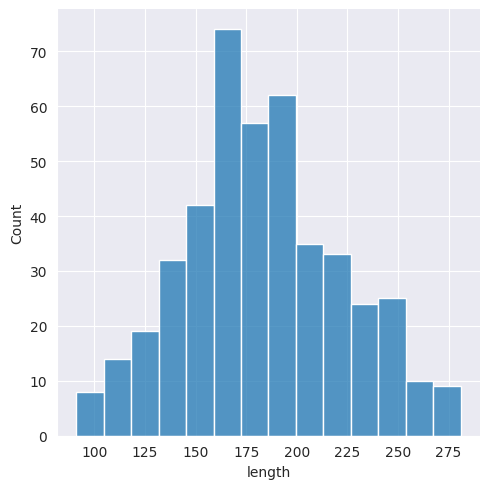

In [ ]:
import seaborn as sns
sns.set_style(style="darkgrid");

sns.displot(data['length']);

In [ ]:
pd.set_option('display.width', None)

In [ ]:
data['abstract']

,abstract
0,"Multimodal representation learning, with contr..."
1,Video-to-audio (V2A) generation utilizes visua...
2,Large-scale video generation models have the i...
3,Zero-shot customized video generation has gain...
4,The rapid growth of user-generated content (UG...
...,...
439,"In this paper, we present StyleLipSync, a styl..."
440,Generating text-editable and pose-controllable...
441,Video Anomaly Detection (VAD) serves as a pivo...
442,This paper tackles recipe generation from unse...


In [ ]:
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower().strip()
    # Удаление HTML-тегов
    text = re.sub('<[^>]+>', '', text)
    # Удаление URL
    text = re.sub(r'http\S+|www\S+|https\S+', '<URL>', text)
    # Удаление знаков препинания
    text = re.sub(r'[^\w\s]', '', text)
    # Удаление цифр
    text = re.sub(r'\d+', '', text)
    # Удаление пробелов
    text = text.strip()

    return text

In [ ]:
data['abstract'] = data['abstract'].apply(preprocess_text)

Токинизируем

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
nltk.download('punkt_tab')

def tokenize_and_ngram(text):

    tokens = word_tokenize(text)


    # unigrams = list(ngrams(tokens, 1))
    # bigrams = list(ngrams(tokens, 2))
    # trigrams = list(ngrams(tokens, 3))

    # all_ngrams = unigrams + bigrams + trigrams
    # all_ngrams = [' '.join(gram) for gram in all_ngrams]

    return tokens


data['abstract'] = data['abstract'].apply(tokenize_and_ngram)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
data

,abstract,length
0,"[multimodal, representation, learning, with, c...",198
1,"[videotoaudio, va, generation, utilizes, visua...",146
2,"[largescale, video, generation, models, have, ...",202
3,"[zeroshot, customized, video, generation, has,...",182
4,"[the, rapid, growth, of, usergenerated, conten...",160
...,...,...
439,"[in, this, paper, we, present, stylelipsync, a...",151
440,"[generating, texteditable, and, posecontrollab...",165
441,"[video, anomaly, detection, vad, serves, as, a...",153
442,"[this, paper, tackles, recipe, generation, fro...",225


Удалим стоп-слова

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stopwords(tokens):
    stop_words = stopwords.words('english')
    # ещё удалим два токена video и deneration, так как оно встречается в каждом title
    # delete_tokens = ['video', 'generation', 'video generation']
    # stop_words = set(stop_words + delete_tokens)
    return [word for word in tokens if word not in stop_words]

In [ ]:
data['abstract'] = data['abstract'].apply(remove_stopwords)

Лематизация

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
data['abstract'] =  data['abstract'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])

In [ ]:
data

,abstract,length
0,"[multimodal, representation, learning, contras...",198
1,"[videotoaudio, va, generation, utilizes, visua...",146
2,"[largescale, video, generation, model, inheren...",202
3,"[zeroshot, customized, video, generation, gain...",182
4,"[rapid, growth, usergenerated, content, ugc, v...",160
...,...,...
439,"[paper, present, stylelipsync, stylebased, per...",151
440,"[generating, texteditable, posecontrollable, c...",165
441,"[video, anomaly, detection, vad, serf, pivotal...",153
442,"[paper, tackle, recipe, generation, unsegmente...",225


# Модель

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.24.0 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.24.0 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.0 which is incom

In [ ]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import gensim
from gensim import corpora, models

In [ ]:
id2word = corpora.Dictionary(data['abstract'])
texts = data['abstract']
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

coherence — это метрика, которая оценивает смысловую согласованность слов внутри тем. В отличие от перплексии, которая измеряет "техническое" качество модели, coherence показывает, насколько темы интерпретируемы человеком.

Попытаемся найти оптимальное соотношение между coherence и perplexity

In [ ]:
from gensim.models.ldamulticore import LdaMulticore

def calc_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(f"\nTraining model with {num_topics} topics...")
        model = LdaMulticore(corpus=corpus,id2word = dictionary, num_topics = num_topics, random_state = 42, passes = 20)
        model_list.append(model)
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = calc_coherence_values(dictionary = id2word, corpus = corpus_tfidf, texts = texts, start = 2, limit = 50, step = 2)


Training model with 2 topics...
0.385642784785891

Training model with 4 topics...
0.3736361107452387

Training model with 6 topics...
0.6566094457642794

Training model with 8 topics...
0.5836897227483651

Training model with 10 topics...
0.6819118772885164

Training model with 12 topics...
0.6241730331349352

Training model with 14 topics...
0.663116347168541

Training model with 16 topics...
0.6585618024192186

Training model with 18 topics...
0.6119361179516478

Training model with 20 topics...
0.6118339003777067

Training model with 22 topics...
0.6067969273896695

Training model with 24 topics...
0.6028676359957003

Training model with 26 topics...
0.6060778279987526

Training model with 28 topics...
0.5832598764087924

Training model with 30 topics...
0.5607407940252316

Training model with 32 topics...
0.5609107767718982

Training model with 34 topics...
0.5615870633048435

Training model with 36 topics...
0.538449807121323

Training model with 38 topics...
0.5519689713154751


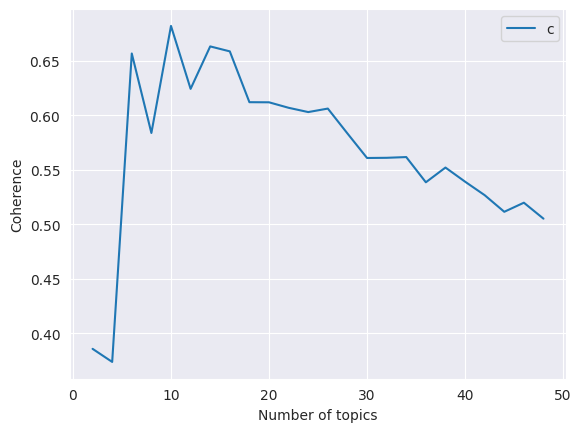

In [ ]:
limit, start, step = 50, 2, 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
d = dict(zip(range(start, limit, step), coherence_values))

In [ ]:
for key, value in d.items():
  m = max(d.values())
  if m == value:
    print("Максимальное coherence: ", m)
    optimum_num_topic = key
    print("Оптимальное кол-во тем: ", key)

Максимальное coherence:  0.6819118772885164
Оптимальное кол-во тем:  10


Найдём оптимальное значение eta и alpha для 10 тем, опирась на coherence:

Alpha: 0.10, Eta: 0.10, Coherence: 0.291
Alpha: 0.10, Eta: 0.30, Coherence: 0.416
Alpha: 0.10, Eta: 0.50, Coherence: 0.528
Alpha: 0.10, Eta: 0.70, Coherence: 0.488
Alpha: 0.10, Eta: 0.90, Coherence: 0.412
Alpha: 0.10, Eta: 1.10, Coherence: 0.451
Alpha: 0.30, Eta: 0.10, Coherence: 0.294
Alpha: 0.30, Eta: 0.30, Coherence: 0.412
Alpha: 0.30, Eta: 0.50, Coherence: 0.472
Alpha: 0.30, Eta: 0.70, Coherence: 0.401
Alpha: 0.30, Eta: 0.90, Coherence: 0.397
Alpha: 0.30, Eta: 1.10, Coherence: 0.395
Alpha: 0.50, Eta: 0.10, Coherence: 0.290
Alpha: 0.50, Eta: 0.30, Coherence: 0.404
Alpha: 0.50, Eta: 0.50, Coherence: 0.390
Alpha: 0.50, Eta: 0.70, Coherence: 0.366
Alpha: 0.50, Eta: 0.90, Coherence: 0.351
Alpha: 0.50, Eta: 1.10, Coherence: 0.333
Alpha: 0.70, Eta: 0.10, Coherence: 0.259
Alpha: 0.70, Eta: 0.30, Coherence: 0.352
Alpha: 0.70, Eta: 0.50, Coherence: 0.357
Alpha: 0.70, Eta: 0.70, Coherence: 0.359
Alpha: 0.70, Eta: 0.90, Coherence: 0.360
Alpha: 0.70, Eta: 1.10, Coherence: 0.303
Alpha: 0.90, Eta

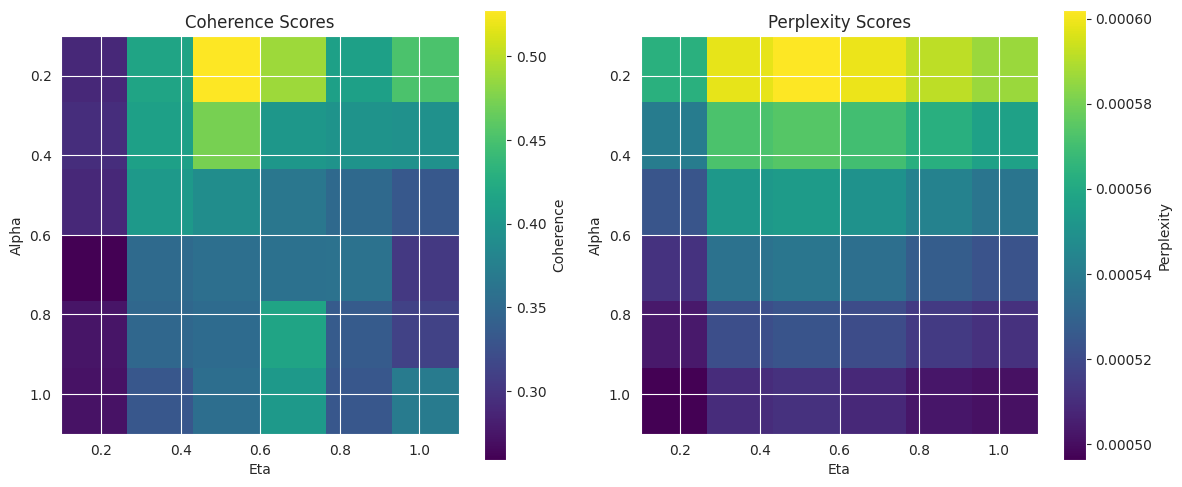

In [ ]:
def evaluate_models(dictionary, corpus, texts, start_alpha=0.1, end_alpha=1.0, step_alpha=0.1,
                    start_eta=0.1, end_eta=1.0, step_eta=0.1, num_topics=10, random_state=42,
                    passes=20, iterations=100, eval_every=0):
    """
    Перебирает значения alpha и eta для LDA

    Args:
        dictionary (gensim.corpora.Dictionary): Словарь.
        corpus (list of list of (int, float)):  Корпус в формате bag-of-words.
        texts (list of list of str):  Список списков токенов (тексты).
        start_alpha (float): Начальное значение alpha.
        end_alpha (float): Конечное значение alpha.
        step_alpha (float): Шаг для alpha.
        start_eta (float): Начальное значение eta.
        end_eta (float): Конечное значение eta.
        step_eta (float): Шаг для eta.
        num_topics (int): Количество тем.
        random_state (int): Зерно для воспроизводимости.
        passes (int): Количество проходов по корпусу.
        iterations (int): Количество итераций для каждой темы.
        eval_every (int):  Оценивать perplexity каждые `eval_every` проходов.  0 - отключает.

    Returns:
        tuple:  (best_alpha, best_eta, best_model, coherence_scores, perplexity_scores, alpha_grid, eta_grid)
    """
    alpha_grid = np.arange(start_alpha, end_alpha + step_alpha, step_alpha)
    eta_grid = np.arange(start_eta, end_eta + step_eta, step_eta)

    coherence_scores = np.zeros((len(alpha_grid), len(eta_grid)))
    perplexity_scores = np.zeros((len(alpha_grid), len(eta_grid)))
    best_coherence = -float('inf')
    best_alpha = None
    best_eta = None
    best_model = None


    for i, alpha in enumerate(alpha_grid):
        for j, eta in enumerate(eta_grid):
            model = LdaMulticore(
                corpus=corpus,
                id2word=dictionary,
                num_topics=num_topics,
                alpha=alpha,
                eta=eta,
                random_state=random_state,
                eval_every=eval_every,
                passes=passes,
                iterations=iterations
            )

            # Оценка coherence
            coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_score = coherence_model.get_coherence()
            coherence_scores[i, j] = coherence_score

            # Получение perplexity (если eval_every > 0, то он уже есть)
            if eval_every > 0:
                perplexity_score = model.log_perplexity(corpus)
                perplexity_scores[i, j] = np.exp(perplexity_score)
            else:
                perplexity_scores[i, j] = np.nan

            print(f'Alpha: {alpha:.2f}, Eta: {eta:.2f}, Coherence: {coherence_score:.3f}')

            if coherence_score > best_coherence:
                best_coherence = coherence_score
                best_alpha = alpha
                best_eta = eta
                best_model = model

    print(f"Оптимальные параметры: alpha = {best_alpha:.2f}, eta = {best_eta:.2f}, Coherence: {best_coherence:.3f}")
    return best_alpha, best_eta, best_model, coherence_scores, perplexity_scores, alpha_grid, eta_grid


def plot_coherence_perplexity(coherence_scores, perplexity_scores, alpha_grid, eta_grid):
    """Строит графики когерентности и perplexity."""

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # График coherence
    im1 = axes[0].imshow(coherence_scores, cmap="viridis", extent=[eta_grid[0], eta_grid[-1], alpha_grid[-1], alpha_grid[0]])
    axes[0].set_xlabel("Eta")
    axes[0].set_ylabel("Alpha")
    axes[0].set_title("Coherence Scores")
    fig.colorbar(im1, ax=axes[0], label="Coherence")

    # График perplexity
    if not np.all(np.isnan(perplexity_scores)):
        im2 = axes[1].imshow(perplexity_scores, cmap="viridis", extent=[eta_grid[0], eta_grid[-1], alpha_grid[-1], alpha_grid[0]])
        axes[1].set_xlabel("Eta")
        axes[1].set_ylabel("Alpha")
        axes[1].set_title("Perplexity Scores")
        fig.colorbar(im2, ax=axes[1], label="Perplexity")
    else:
         axes[1].set_title("Perplexity Scores (Не рассчитывался)")
    plt.tight_layout()
    plt.show()


# Параметры перебора
start_alpha = 0.1
end_alpha = 1.0
step_alpha = 0.2
start_eta = 0.1
end_eta = 1.0
step_eta = 0.2
num_topics = 10
random_state = 42
passes = 20
iterations = 100
eval_every = 5


best_alpha, best_eta, best_model, coherence_scores, perplexity_scores, alpha_grid, eta_grid = evaluate_models(
    dictionary=id2word,
    corpus=corpus,
    texts=texts,
    start_alpha=start_alpha,
    end_alpha=end_alpha,
    step_alpha=step_alpha,
    start_eta=start_eta,
    end_eta=end_eta,
    step_eta=step_eta,
    num_topics=num_topics,
    random_state=random_state,
    passes=passes,
    iterations=iterations,
    eval_every=eval_every
)

plot_coherence_perplexity(coherence_scores, perplexity_scores, alpha_grid, eta_grid)

In [ ]:
final_model = LdaMulticore(corpus=corpus,
                           id2word = id2word,
                           num_topics = 10,
                           alpha = 0.10,
                           eta = 0.50,
                           random_state = 42,
                           passes = 50,
                           iterations=100)

In [ ]:
log_perplexity = final_model.log_perplexity(corpus)
perplexity = 2 ** (-log_perplexity)
print("Perplexity:", perplexity)

Perplexity: 169.25264517162958


In [ ]:
coherence = CoherenceModel(model = final_model, texts = texts, dictionary = id2word, coherence = 'c_v')
print(f"Coherence: {coherence.get_coherence():.3f}")

Coherence: 0.518


In [ ]:
topics =final_model.print_topics()

In [ ]:
topics

[(0,
  '0.005*"agent" + 0.003*"ffa" + 0.002*"radar" + 0.002*"mesh" + 0.002*"cf" + 0.002*"retinal" + 0.001*"panacea" + 0.001*"redesign" + 0.001*"crossdomain" + 0.001*"handobject"'),
 (1,
  '0.003*"gfvc" + 0.003*"meeting" + 0.002*"sei" + 0.002*"scenespecific" + 0.002*"expression" + 0.001*"coding" + 0.001*"blendshapes" + 0.001*"ssms" + 0.001*"potential" + 0.001*"technology"'),
 (2,
  '0.003*"panoramic" + 0.003*"emotional" + 0.003*"retrieval" + 0.002*"emotion" + 0.002*"grounding" + 0.002*"rpm" + 0.002*"cue" + 0.002*"sam" + 0.002*"segment" + 0.001*"qoe"'),
 (3,
  '0.004*"game" + 0.003*"disease" + 0.003*"narrative" + 0.002*"pangea" + 0.002*"cache" + 0.002*"llm" + 0.001*"response" + 0.001*"progression" + 0.001*"medical" + 0.001*"mcts"'),
 (4,
  '0.004*"unsafe" + 0.002*"forgery" + 0.002*"embodied" + 0.002*"unknown" + 0.001*"defense" + 0.001*"sharegptvideo" + 0.001*"vsr" + 0.001*"curve" + 0.001*"echocardiography" + 0.001*"predictive"'),
 (5,
  '0.030*"video" + 0.018*"model" + 0.013*"generation"

In [ ]:
def connect_high_weight_words(topic_string, threshold=0.0005):
    """
    Извлекает слова с весом больше заданного порога и соединяет их в строку.

    Args:
        topic_string (str): Строка, представляющая тему (например, из вывода LDA).
        threshold (float): Порог для веса слова.

    Returns:
        str: Строка, содержащая слова с весом больше порога, разделенные запятыми.
    """
    words = []
    keywords_with_weights = [s.split('*') for s in topic_string.split('+')]
    keywords_with_weights = [(float(weight.replace('"', '')), word.strip().replace('"','')) for weight, word in keywords_with_weights]

    for weight, word in keywords_with_weights:
        if weight > threshold:
            words.append(word)

    return ", ".join(words)

Давайте попробуем объединить ручным способом

In [ ]:
def extract_keywords(topic_str, threshold= 0.000):
    """Извлекает ключевые слова с весом выше threshold."""
    keywords = []
    for part in topic_str.split(' + '):
        weight, word = part.split('*"')
        word = word.rstrip('"')
        weight = float(weight)
        if weight >= threshold:
            keywords.append((word, weight))
    return keywords

def group_phrases(keywords, top_n=5):
    """Группирует ключевые слова в словосочетания."""
    # Сортируем слова по весу
    keywords_sorted = sorted(keywords, key=lambda x: -x[1])
    # Берем top_n слов для формирования фраз
    top_words = [word for word, weight in keywords_sorted[:top_n]]
    # Формируем возможные сочетания
    phrases = []
    if len(top_words) >= 3:
        phrases.append(f"{top_words[0]} {top_words[1]}")
    elif len(top_words) >= 3:
        phrases.append(f"{top_words[1]} {top_words[2]}")
    elif len(top_words) >= 3:
        phrases.append(f"{top_words[1]} {top_words[2]} {top_words[3]}")
    return phrases


topics_words = []
# Обрабатываем все топики
for topic_id, topic_str in final_model.print_topics():

    keywords = extract_keywords(topic_str)
    phrases = group_phrases(keywords)
    topics_words.append([word for word, weight in keywords])

    print(f"\nТопик {topic_id}:")
    print("Ключевые слова:", [word for word, weight in keywords])
    print("Возможные словосочетания:", phrases)


Топик 0:
Ключевые слова: ['agent', 'ffa', 'radar', 'mesh', 'cf', 'retinal', 'panacea', 'redesign', 'crossdomain', 'handobject']
Возможные словосочетания: ['agent ffa']

Топик 1:
Ключевые слова: ['gfvc', 'meeting', 'sei', 'scenespecific', 'expression', 'coding', 'blendshapes', 'ssms', 'potential', 'technology']
Возможные словосочетания: ['gfvc meeting']

Топик 2:
Ключевые слова: ['panoramic', 'emotional', 'retrieval', 'emotion', 'grounding', 'rpm', 'cue', 'sam', 'segment', 'qoe']
Возможные словосочетания: ['panoramic emotional']

Топик 3:
Ключевые слова: ['game', 'disease', 'narrative', 'pangea', 'cache', 'llm', 'response', 'progression', 'medical', 'mcts']
Возможные словосочетания: ['game disease']

Топик 4:
Ключевые слова: ['unsafe', 'forgery', 'embodied', 'unknown', 'defense', 'sharegptvideo', 'vsr', 'curve', 'echocardiography', 'predictive']
Возможные словосочетания: ['unsafe forgery']

Топик 5:
Ключевые слова: ['video', 'model', 'generation', 'audio', 'less', 'task', 'dataset', 'e

In [ ]:
def extract_keywords(topic_str, threshold=0.000):
    """Извлекает ключевые слова с весом выше threshold."""
    keywords = []
    for part in topic_str.split(' + '):
        weight, word = part.split('*"')
        word = word.rstrip('"')
        weight = float(weight)
        if weight >= threshold:
            keywords.append((word, weight))
    return keywords

def group_phrases(keywords, phrase_length=4):
    """Группирует ключевые слова в содержательные словосочетания."""
    # Сортируем слова по весу
    keywords_sorted = sorted(keywords, key=lambda x: -x[1])

    # Берем топ-N слов для формирования фраз
    top_words = [word for word, weight in keywords_sorted[:max(5, phrase_length + 2)]]

    # Формируем сочетания разной длины
    phrases = []

    # Основное сочетание из 4-5 ключевых слов
    if len(top_words) >= phrase_length:
        main_phrase = " ".join(top_words[:phrase_length])
        phrases.append(main_phrase)

    # Дополнительные вариации
    if len(top_words) >= 5:
        # Вариант с пропуском 1 слова
        phrases.append(f"{top_words[0]} {top_words[2]} {top_words[3]} {top_words[4]}")
        # Вариант с перестановкой
        phrases.append(f"{top_words[1]} {top_words[0]} {top_words[2]} {top_words[3]}")

    # Удаляем дубликаты
    unique_phrases = []
    seen = set()
    for phrase in phrases:
        if phrase not in seen:
            seen.add(phrase)
            unique_phrases.append(phrase)

    return unique_phrases[:3]  # Возвращаем не более 3 вариантов

topics_words = []
phrases = []

# Обрабатываем все топики
for topic_id, topic_str in final_model.print_topics():
    keywords = extract_keywords(topic_str)
    phrase = group_phrases(keywords, phrase_length=4)
    topics_words.append([word for word, weight in keywords])
    phrases.append(phrase)

    print(f"\nТопик {topic_id}:")
    print("Ключевые слова:", [word for word, weight in keywords])
    print("Словосочетания:", phrase)


Топик 0:
Ключевые слова: ['agent', 'ffa', 'radar', 'mesh', 'cf', 'retinal', 'panacea', 'redesign', 'crossdomain', 'handobject']
Словосочетания: ['agent ffa radar mesh', 'agent radar mesh cf', 'ffa agent radar mesh']

Топик 1:
Ключевые слова: ['gfvc', 'meeting', 'sei', 'scenespecific', 'expression', 'coding', 'blendshapes', 'ssms', 'potential', 'technology']
Словосочетания: ['gfvc meeting sei scenespecific', 'gfvc sei scenespecific expression', 'meeting gfvc sei scenespecific']

Топик 2:
Ключевые слова: ['panoramic', 'emotional', 'retrieval', 'emotion', 'grounding', 'rpm', 'cue', 'sam', 'segment', 'qoe']
Словосочетания: ['panoramic emotional retrieval emotion', 'panoramic retrieval emotion grounding', 'emotional panoramic retrieval emotion']

Топик 3:
Ключевые слова: ['game', 'disease', 'narrative', 'pangea', 'cache', 'llm', 'response', 'progression', 'medical', 'mcts']
Словосочетания: ['game disease narrative pangea', 'game narrative pangea cache', 'disease game narrative pangea']

То

Таким образом, темы

In [ ]:
num_topc = 1
for topic in phrases:
  print(num_topc, 'Video generation:', topic[0])
  num_topc+=1

1 Video generation: agent ffa radar mesh
2 Video generation: gfvc meeting sei scenespecific
3 Video generation: panoramic emotional retrieval emotion
4 Video generation: game disease narrative pangea
5 Video generation: unsafe forgery embodied unknown
6 Video generation: video model generation audio
7 Video generation: evaluation quality metric benchmark
8 Video generation: pain ethical opening recognizing
9 Video generation: plane pedestrian law alphatablets
10 Video generation: video model generation method


In [ ]:
#!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(final_model, corpus, id2word, sort_topics = False)
pyLDAvis.display(lda_display)